# **Using Tensorflow for detecting Covid-19 Infected Lungs from Normal Lungs with Chest X-Ray**

Dataset collection and splitting into training and testing.


Dataset - Radioraphy with 3616 covid xray images and over 10,000 normal lungs images. We picked 3616 normal images to eliminate bias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
tf.random.set_seed(12)

In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file
zip_file_path = '/content/drive/My Drive/archive (3).zip'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Use /tmp to create temporary folder

In [ ]:
!unzip '/content/drive/MyDrive/archive (3).zip' -d '/content/drive/MyDrive/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: /content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: 

In [ ]:
!ls -1 "/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Lung_Opacity/images"| wc -l

6012


In [ ]:
!mkdir /content/drive/MyDrive/Xray_train_data

In [ ]:
!cp -R "/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/COVID/images" "/content/drive/MyDrive/Xray_train_data/COVID"

In [ ]:
!ls -1 "/content/drive/MyDrive/Xray_train_data/COVID"| wc -l

3616


In [ ]:
!mkdir "/content/drive/MyDrive/Xray_train_data/NORMAL"

In [ ]:
PATH_TO_METADATA = "/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal.metadata.xlsx"
df = pd.read_excel(PATH_TO_METADATA)
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
import os
import shutil
cnt = 0
for (i, row) in df.iterrows():
    if (cnt < 3616):
        filename = row["FILE NAME"].lower().capitalize() + "." + row["FORMAT"].lower()
        image_path = os.path.join("/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Normal/images", filename)
        image_copy_path = os.path.join("/content/drive/MyDrive/Xray_train_data/NORMAL", filename)
        shutil.copy2(image_path, image_copy_path)
        cnt += 1

In [ ]:
print(cnt)

3616


In [ ]:
!mkdir "/content/drive/MyDrive/Xray_train_data/Lung_Opacity"

In [ ]:
PATH_TO_METADATA = "/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx"
df = pd.read_excel(PATH_TO_METADATA)
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
import os
import shutil
cnt = 0
for (i, row) in df.iterrows():
    if (cnt < 3616):
        filename = row["FILE NAME"] + "." + row["FORMAT"].lower()
        image_path = os.path.join("/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Lung_Opacity/images", filename)
        image_copy_path = os.path.join("/content/drive/MyDrive/Xray_train_data/Lung_Opacity", filename)
        shutil.copy2(image_path, image_copy_path)
        cnt += 1
print(cnt)

3616


In [ ]:
!mkdir "/content/drive/MyDrive/Xray_train_data/Viral Pneumonia"

In [ ]:
PATH_TO_METADATA = "/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
df = pd.read_excel(PATH_TO_METADATA)
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
import os
import shutil
cnt = 0
for (i, row) in df.iterrows():
    if (cnt < 3616):
        filename = row["FILE NAME"] + "." + row["FORMAT"].lower()
        image_path = os.path.join("/content/drive/MyDrive/dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images", filename)
        image_copy_path = os.path.join("/content/drive/MyDrive/Xray_train_data/Viral Pneumonia", filename)
        shutil.copy2(image_path, image_copy_path)
        cnt += 1

In [ ]:
!ls -1 "/content/drive/MyDrive/Xray_train_data"| wc -l

4


In [ ]:
!ls -1 "/content/drive/MyDrive/Xray_train_data/COVID"| wc -l

3616


## **Starting Actual work**

In [ ]:
!ls -1 "/content/drive/MyDrive/Xray_train_data/Lung_Opacity"| wc -l

3616


In [ ]:
!ls -1 "/content/drive/MyDrive/Xray_train_data/Viral Pneumonia"| wc -l

1345


In [ ]:
train_data_dir= "/content/drive/MyDrive/Xray_train_data"

In [ ]:
IMAGE_SIZE = (256, 256)
IMAGE_SHAPE = IMAGE_SIZE + (3,)

Found 8538 images belonging to 4 classes.
Found 3655 images belonging to 4 classes.


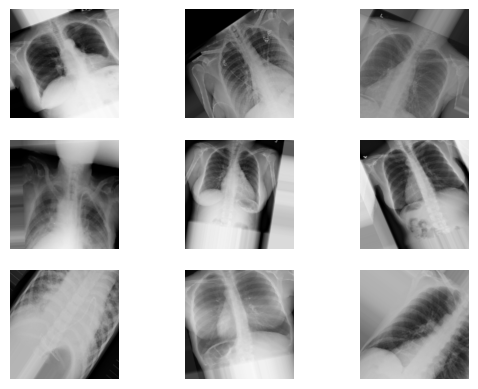

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Parameters
img_height, img_width = 224, 224  # Set your image size
batch_size = 16
train_data_dir = '/content/drive/MyDrive/Xray_train_data'  # Replace with the path to your training data directory

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,  # Randomly apply zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    rotation_range=40,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    validation_split=0.3  # Set validation split
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'  # Set as training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'  # Set as validation data
)

# Visualize some augmented images
x, y = next(train_generator)  # Get a batch of training data
for i in range(9):  # Show 9 augmented images
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()
